Data Mining: Basic Concepts - WS'22/23
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Raphael Buchmüller, Udo Schlegel, Yannick Metz
```
__Organize in teams of 2 people, return the exercise by Sun, Nov 13th, 2022 (11:59 PM) using ILIAS__

---

Assignment 02 in Python
---------------
- ___Please put your names and student IDs here___:
    - _Lennart Gießing_, _921963_
    - _Nicolas Fröhlich_, _912433_

---

#### Exercise 1: Data Types
Imagine you have the following dataset:

| Date  	| City   	| Country  	| Temperature | Wind	|
|------ 	|----------	|-----------|-------------|---------|
|11.10.2022 |Konstanz   | Germany   |  17°C       | Low     |
|11.10.2022 |Chicago    | US        |  18°C       | Strong  |
|13.10.2022 |Sydney     | Australia |  11°C       | Medium  |

##### __(a) Describe for each column whether it contains nominal, ordinal or numerical data and explain why you made that decision__

```
Date: Ordinal/Numerical
Date could be either ordinal or numerical. Ordinal because we can put it in an order. The 11.10 is before the 13.10. We can as well make calculations as in numerical values. But in this case we can not distinguish the exact difference between two events. The difference between 11.10.22 and 13.10.22 are two days. But we do not know when exactly something happened on one day. The distance between two events could be just little more than a day or nearly three days. Therefore Date could be both. That depends on the purpose of the data.

City: Nominal 
Because it's supposed to distinguish between different places. But there is no way to put cities in an order, just based on their name. Maybe alphabetically, but again heavily depending on the usecase.

Country: Nominal
Because it supposed to distinguish between different places. But there is no way to put countries in an order, just based on their name.

Temperature: Numerical
You can put different temperatures in an order. And based on the numbers you can do the maths.

Wind: Ordinal 
You can put the different strenght of wind in an order. But there is no way to see numerical differences between the different "levels". Therefore it is not numerical.
```

##### __(b) Give at least one mathematical operation that can be used on all three data types__

```
==   equal to

!=   unequal to
```

---

#### Exercise 2: Missing Values

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_exercise2.csv')
df

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __The data contains missing values. In the following we will apply 4 different ways to deal with missing values known from the lecture.__ 

##### __(a) Drop the rows containing missing values and store your result as ``df1`` (Note: do not drop the rows in the original ``df``).__ 

In [3]:
df1 = df.dropna()
df1

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __(b) Another method is to assign a global constant to missing values. Assign ``-1`` to each missing value and store the new dataframe in ``df2``.__ 

In [4]:
df2 = df.fillna(-1)
df2

,x,y
0,-2.000000,-15.000000
1,-1.939394,-13.309236
2,-1.878788,-11.690597
3,-1.818182,-10.142750
4,-1.757576,-8.664357
...,...,...
95,3.757576,8.455909
96,3.818182,9.258452
97,3.878788,10.115758
98,3.939394,11.029162


##### __(c) Now fill in the missing values using the attribute mean and store it in ``df3``. Plot the result using the ``seaborn.scatterplot``method.__ 

In [5]:
df3 = df.fillna(df.mean())
df3.mean()

x    1.000000
y    4.390449
dtype: float64

<AxesSubplot:>

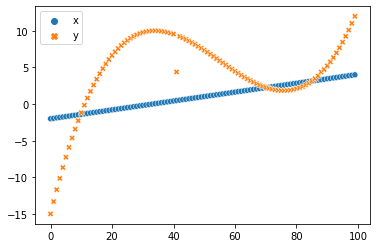

In [6]:
sns.scatterplot(data = df3)

##### __(d) Instead of filling the missing values with the mean, we will now try to fill them using regression.__
##### __(d.1)What polynomial degree does the function you are looking for most likely have?__ _(Hint: Use the ``seaborn.regplot`` method and modify the ``order`` parameter)_

<AxesSubplot:xlabel='x', ylabel='y'>

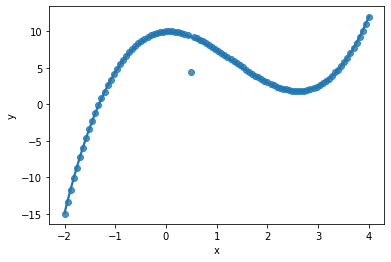

In [7]:
sns.regplot(data = df3, x = "x", y = "y", order = 3)

```
Most likely it will have a degree of 3 or another odd number (5,7) as the function is not formed as a parabel.
Polynomial degree 3 
```

##### __(d.2) Compute the coefficients for the function that describes the data__ _(Hint: drop missing values and use ``numpy.polyfit()``)_

In [8]:
x = df1["x"]
y = df1["y"]
z = np.polyfit(x, y, 3)
print(z)
##########
# I was using the df1 for that because there we had all rows dropped that had NAs
# These are the coefficients:  1 , -4 ,  0.5, 10
# The resulting regression equation therefore is y = x^3 - 4x^2 + 0.5x + 10

[ 1.  -4.   0.5 10. ]


##### __(d.3) Use the computed polynomial coefficients to implement a regression method. Use the method to fill the missing values in the dataframe with values  and store it as ``df4``.__

In [9]:
def fill_with_regression(x):
    return 1*x**3 - 4*x**2 + 0.5*x + 10 # use regression from above

In [10]:
df4 = df

# fill missing values by using the regression
df4['y'] = df4['y'].fillna(fill_with_regression(df4['x']))

In [11]:
df4.isnull().sum() # check that there are no missing values left

x    0
y    0
dtype: int64

##### __(e) Plot all your results (dropNA, global constant, mean and polynomial regression) and compare the results. Which of the 4 methods would you use here? Explain your decision.__

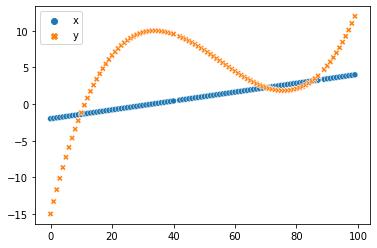

In [12]:
plot1 = sns.scatterplot(data = df1)

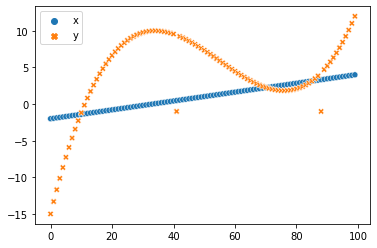

In [13]:
plot2 = sns.scatterplot(data = df2)

<AxesSubplot:>

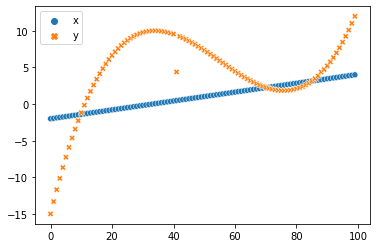

In [14]:
sns.scatterplot(data = df3)

<AxesSubplot:>

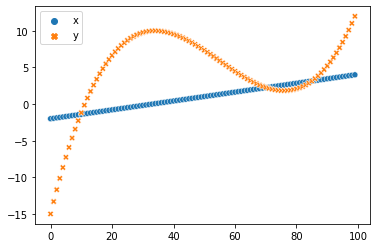

In [15]:
sns.scatterplot(data = df4)

```
Handling the missing values with the regression imputation is definitely the best way, as it produces the most plausible results and avoids complications further down the KDD-way like having strong outliers (as in df2 or df3) or still having missing data (as in df1)
```

---

#### Exercise 3: Data Cleaning
Clean the following cereal dataset containing nutrition data on 80 cereal products. The commands have to work for different datasets as well. 

Careful: If you like to eat cereal, do yourself a favor and do not look at the numbers. After seeing these data it will never be the same to eat Fruity Pebbles again.

In [16]:
import pandas as pd
df = pd.read_csv('cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70.0,4.0,1,130.0,10.0,5.0,6,280.0,25.0,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120.0,3.0,5,15.0,2.0,8.0,8,135.0,0.0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70.0,4.0,1,260.0,9.0,7.0,5,320.0,25.0,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0,140.0,14.0,8.0,0,330.0,25.0,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8,-1.0,25.0,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1,250.0,0.0,21.0,3,60.0,25.0,3,1.0,0.75,39.106174;;
73,Trix,G,C,110.0,1.0,1,140.0,0.0,13.0,12,25.0,25.0,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100.0,3.0,1,NaN,3.0,17.0,3,115.0,25.0,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100.0,3.0,1,200.0,3.0,17.0,3,110.0,25.0,1,1.0,1.00,51.592193;;


##### __(a) Are there columns with missing values?__

In [17]:
df.columns[df.isnull().any()]
# The columns in the output are the columns with missing values

Index(['calories', 'protein', 'sodium', 'carbo', 'potass', 'vitamins', 'cups'], dtype='object')

##### __(b) Drop all rows that have at least three `NaN` values.__

In [18]:
# set threshold so that rows only get dropped when they have less than
# (number of cols - 2) *valid* values (=minimum 3 NaN values) 
dfna = df.dropna(thresh=len(df.columns)-2,axis=0) 
dfna

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating;;
0,100% Bran,N,C,70.0,4.0,1,130.0,10.0,5.0,6,280.0,25.0,3,1.0,0.33,68.402973;;
1,100% Natural Bran,Q,C,120.0,3.0,5,15.0,2.0,8.0,8,135.0,0.0,3,1.0,1.00,33.983679;;
2,All-Bran,K,C,70.0,4.0,1,260.0,9.0,7.0,5,320.0,25.0,3,1.0,0.33,59.425505;;
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0,140.0,14.0,8.0,0,330.0,25.0,3,1.0,0.50,93.704912;;
4,Almond Delight,R,C,110.0,2.0,2,200.0,1.0,14.0,8,-1.0,25.0,3,1.0,0.75,34.384843;;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110.0,2.0,1,250.0,0.0,21.0,3,60.0,25.0,3,1.0,0.75,39.106174;;
73,Trix,G,C,110.0,1.0,1,140.0,0.0,13.0,12,25.0,25.0,2,1.0,1.00,27.753301;;
74,Wheat Chex,R,C,100.0,3.0,1,NaN,3.0,17.0,3,115.0,25.0,1,1.0,0.67,49.787445;;
75,Wheaties,G,C,100.0,3.0,1,200.0,3.0,17.0,3,110.0,25.0,1,1.0,1.00,51.592193;;


##### __(c) Replace the `NaN` values of remaining columns with missing values using linear interpolation. Limit the maximum number of consecutive `NaN` to fill to ``1``. Are there still `NaN` values and if yes, in which column?__

In [19]:
df_interpolated = df.interpolate(limit = 1) # maximum number of consecutive NaN to fill 
# is limited to 1
print(df_interpolated)

                         name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C      70.0      4.0    1   130.0   10.0   
1           100% Natural Bran   Q    C     120.0      3.0    5    15.0    2.0   
2                    All-Bran   K    C      70.0      4.0    1   260.0    9.0   
3   All-Bran with Extra Fiber   K    C      50.0      4.0    0   140.0   14.0   
4              Almond Delight   R    C     110.0      2.0    2   200.0    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C     110.0      2.0    1   250.0    0.0   
73                       Trix   G    C     110.0      1.0    1   140.0    0.0   
74                 Wheat Chex   R    C     100.0      3.0    1   170.0    3.0   
75                   Wheaties   G    C     100.0      3.0    1   200.0    3.0   
76        Wheaties Honey Gold   G    C     110.0      2.0    1   200.0    1.0   

    carbo  sugars  potass  

In [20]:
print(f'There are {df_interpolated.isnull().sum().values} missing values left.')
print(f'The remaining missing value is in column "{df_interpolated.columns[4]}".')

There are [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0] missing values left.
The remaining missing value is in column "protein".


---

#### Exercise 4: Binning
The following data consists of the age of several people: 
```
> [2, 19, 21, 23, 24, 25, 28, 29, 30, 30, 33, 35, 36, 36, 40, 45, 46, 48, 48, 48, 52, 54, 56, 58, 59, 59, 62]

```

##### __(a) Apply binning to the dataset using 3 equal-width bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
W = (62-2)/3 = 20
Calculate the Width

Calculate the range for the different bins
Bin1 Range = [2+20] = 22
Bin2 Range = [2+2(20)] = 42
Bin3 Range = [2+3(20)] = 62

Show the ages in the different bins
Bin1 = 2, 19, 21
Bin2 = 23, 24, 25, 28, 29, 30, 30, 33, 35, 36, 36, 40
Bin3 = 45, 46, 48, 48, 48, 52, 54, 56, 58, 59, 59, 62

Smoothed Bin = [14, 14, 14, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 30.75, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92, 52.92]

```

##### __(b) Apply binning to the dataset using 3 equal-depth bins. Smooth the data using the mean of the bins. Explain the steps of your approach and give the final result.__
##### __Please solve this exercise by hand without using Python__ 

```
Number of values/number of bins
27/3= 9

Bin1 = 2, 19, 21, 23, 24, 25, 28, 29, 30                                  
Bin2 = 30, 33, 35, 36, 36, 40, 45, 46, 48
Bin3 = 48, 48, 52, 54, 56, 58, 59, 59, 62

Smoothed bin = [22.33, 22.33, 22.33, 22.33, 22.33, 22.33, 22.33, 22.33, 22.33, 38.78, 38.78, 38.78, 38.78, 38.78, 38.78, 38.78, 38.78, 38.78, 55.11, 55.11, 55.11, 55.11, 55.11, 55.11, 55.11, 55.11, 55.11]
```

##### __(c) Compare the results from a) and b). Give one reason why equal-depth binning might be preferable in this scenario.__

```
Equal-depth binning is preferable as it is less prone to distortions due to outliers. In this scenario, the first value (age 2) is an outlier that leads to very inequally sized bins when using equal-width binning.
```

---

#### Exercise 4: Normalization

##### __(a) Which of the columns in the following table can be normalized using the linear or logarithmic min-max normalization? Discuss if the normalization is useful or not.__

|id |Gender|Size (cm)|Weight (kg)|Hair Color|Blood Type|Glasses|Salary(€)|
|---|------|---------|-----------|----------|----------|-------|------|
|22|Female|175|65|red|A|yes|3900|
|23|Female|176|71|red|AB|yes|4200|
|24|Female|176|71|red|O|yes|2800|
|25|Female|179|69|black|B|yes|5100|
|26|Female|195|62|black|B|no|3850|
|27|Female|204|64|black|O|yes|2200|
|28|Female|163|70|brown|AB|no|8000|
|29|Female|172|62|brown|AB|no|1900|
|30|Female|166|52|brown|AB|no|4450|
|31|Female|182|67|brown|AB|no|3900|
|32|Female|168|70|brown|O|yes|65000|
|33|Female|168|59|blond|B|no|450|
|34|Male|168|62|black|B|no|5100|
|35|Male|178|63|red|B|no|450|
|36|Male|178|59|red|AB|no|2900|
|37|Male|172|67|brown|A|yes|3200|
|38|Male|172|58|brown|A|no|3100|
|39|Male|185|62|brown|A|no|10500|
|40|Male|190|76|black|B|yes|2800|
|41|Male|184|70|black|B|yes|4100|

```
Normalization can be used for numeric values in order to normalize their distribution (usually to values between 0 and 1).
The varialbes height, weight and salary from the df are suitalbe for normalization.
Logarithmic normalization is widely used for monetary data, e.g. salary, as it displays the data in percental relations, normalizing salary with logarithmic normalization therefore seems plausible. 
The variables height and weight could be linearly normalized to 0:1 to handle their differences in scales (which is approx 160 to 210 for height and 50 to 120 for weight).
```

<font color='red'> id can also be normalized but is not useful

##### __(b) Using the column “Size”, use linear min-max normalization to transform the values ``168, 182, 195`` into the range ``[0, 1]``. Give the formula used to compute the values, including min/max value.__

The formula is: ```(v - v_min) / (v_max - v_min)```

The minimum value is 163 and the maximum value is 204

168: ```(168-163)/(204-163) = 5/41 = 0.12195```

182: ```(182-163)/(204-163) = 19/41 = 0.46341```

195: ```(195-163)/(204-163) = 32/41 = 0.78049```

##### __(c) Using the column “Weight”, use logarithmic min-max normalization to transform the values ``59, 63, 70`` into the range ``[0, 1]``. Give the formula used to compute the values, in-cluding min/max value__

The formula is: ```(log(x) - log(x_min)) / (log(x_max) - log(x_min))```

log(x_min) = log(52) = 1.7160

log(x_max) = log(76) = 1.8808

59: ```log(59) = 1.7709 -> (1.7709 - 1.7160) / (1.8808 - 1.7160) = 0.0549 / 0.1648 = 0.3331```

63: ```log(63) = 1.7993 -> (1.7993 - 1.7160) / (1.8808 - 1.7160) = 0.0833 / 0.1648 = 0.5055```

70: ```log(70) = 1.8451 -> (1.8451 - 1.7160) / (1.8808 - 1.7160) = 0.1291 / 0.1648 = 0.7834```

##### __(d) Which of the two normalization methods (linear & logarithmic) would you use for the column ``salary`` if you want to use your normalized data later on for some statistical modeling? Briefly explain your choice.__

```
For money-related values like salaries it makes sense to use a logarithmic normalization. That way the differences can be interpreted as percentage differences, which makes it very convenient to analyze the dataset. Furthermore, extreme outliers (which happen quite often in money-related data) don't distort the normalized scale that much.
```

##### __(e) Write a function to normalize all columns of the following dataframe using the square root min-max normalization.__

In [21]:
import pandas as pd
df_nom = pd.DataFrame(list(zip(range(0, 100) , range(750, 850), range(11122, 11222))), 
               columns =['a', 'b', 'c'])
print(df_nom)

     a    b      c
0    0  750  11122
1    1  751  11123
2    2  752  11124
3    3  753  11125
4    4  754  11126
..  ..  ...    ...
95  95  845  11217
96  96  846  11218
97  97  847  11219
98  98  848  11220
99  99  849  11221

[100 rows x 3 columns]


In [22]:
def sqrt_min_max_normalization(df):
    
    """
    Function to calculate the square root min-max normalization of a dataframe.
    
    Parameters:
    -------------
    df: pandas dataframe with columns to be normalized
    
    Returns:
    -------------
    df_normalized: pandas dataframe with square root min-max normalized columns
    """
    
    df_normalized = df
    
    for i in df.columns:
        df_normalized[i] = np.sqrt(df[i]) - np.sqrt(df[i].min()) / np.sqrt(df[i].max()) - np.sqrt(df[i].min())
    
    return df_normalized

In [23]:
sqrt_min_max_normalization(df_nom)

,a,b,c
0,0.000000,-0.939889,-0.995579
1,1.000000,-0.921638,-0.990838
2,1.414214,-0.903399,-0.986097
3,1.732051,-0.885172,-0.981357
4,2.000000,-0.866957,-0.976616
...,...,...,...
95,9.746794,0.742866,-0.546133
96,9.797959,0.760062,-0.541412
97,9.848858,0.777247,-0.536691
98,9.899495,0.794422,-0.531971


<font color='red'> normalization results should be between 0 and 1

<font color='green'>Grade: Green